# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import datetime
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

# Initial exploration


In [3]:
# Initial exploration
print("==== Initial Data exploration ====")
df.head()

==== Initial Data exploration ====


,Timestamp,Email Address,What's Your Age?,What do you consider as Cyber bullying?,What Age group of people are most Vulnerable to Cyber bullying,Have you ever been cyber bullied?,"If Yes , What was the way you dealt with the same",What do you think made you the victim of cyber bullying?,What Platform according to you leads in cyber bullying,What type of people are usually the bullies on the internet?,Have You ever knowingly / Unknowingly bullied someone on the internet?,What lead you to bully someone ? ( if yes ),What kind of people are usually the victims of cyber-bullying?,What are the causes of cyber bullying according to you,"What has more impact on an individual , Cyber Bullying or Bullying in real life ?",Who are bullies usually?,Youtube Roasting is a form of bullying. Do you agree ?,"Your opinion on the dank communities on the internet , usually involved in bullying?"
0,1/22/2022 11:39:31,armadhav2007@gmail.com,15 - 18,"Hacking / Phishing your private details, Spamm...",19-30,No,NaN,NaN,Whatsapp / Email,for money,No,NaN,All of above,Lack of awareness,Cyber Bullying,Can be both,No,-
1,1/22/2022 11:40:39,nikhilkumar38674@gmail.com,Above 18,"Hacking / Phishing your private details, Spamm...",equally vulnerable,No,NaN,NaN,Discord,computer friendly,Yes,privacy leak,People with Distinctive Physical appearance,Lack of awareness,equal impact,Can be both,Yes,no
2,1/22/2022 11:41:15,guptasayyam7@gmail.com,15 - 18,"Spamming , Unlawfully morphing your images, Me...",15 - 18,Yes,Blocked / Reported The Bully,idk\n,Discord,anyone can get cyber bullied,No,NaN,All of above,Lack of awareness,equal impact,Can be both,No,goverment should take a action
3,1/22/2022 11:41:57,sonaissuhani@gmail.com,15 - 18,"Mean/Inappropriate Comments, Pranks Calls by s...",15 - 18,Yes,"I was scared to do anything, Blocked / Reporte...",my immatureness,Instagram,people who are just useless and dont have anyt...,Yes,revenge to my bully,All of above,Lack of awareness,Cyber Bullying,A stranger,Yes,"According to my opinion, not everyone likes ge..."
4,1/22/2022 11:42:02,madmaxhu69@gmail.com,15 - 18,"Mean/Inappropriate Comments, Spamming , Unlawf...",Below 15,No,"Aaj mere paas bangla 🏢 hai, gadi hai 🚗, bank-b...",Kanta 🪡 Laga 🤧 Ooi 🥴 Maa 😫\nOoi 🥴Maa😫 Ooi 🥴Maa...,Hum💪🏻 tum mein😖 itne ched karenge 🙀👌🏻 ... ki c...,The one who ain't get attention irl and online,Yes,Are mozzer hu bhay,Influencers / Famous People,Sadism,Bullying in real life,Can be both,No,Ye gajar 🥕 hai 😮 lagta hai 🤔 abhi khanka 🍗 hai...


In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 68 entries, 0 to 67

Data columns (total 18 columns):

 #   Column                                                                                 Non-Null Count  Dtype 

---  ------                                                                                 --------------  ----- 

 0   Timestamp                                                                              68 non-null     object

 1   Email Address                                                                          68 non-null     object

 2   What's Your Age?                                                                       68 non-null     object

 3   What do you consider as Cyber bullying?                                                67 non-null     object

 4   What Age group of people are most Vulnerable to Cyber bullying                         68 non-null     object

 5   Have you ever been cyber bullied?                                            

,Timestamp,Email Address,What's Your Age?,What do you consider as Cyber bullying?,What Age group of people are most Vulnerable to Cyber bullying,Have you ever been cyber bullied?,"If Yes , What was the way you dealt with the same",What do you think made you the victim of cyber bullying?,What Platform according to you leads in cyber bullying,What type of people are usually the bullies on the internet?,Have You ever knowingly / Unknowingly bullied someone on the internet?,What lead you to bully someone ? ( if yes ),What kind of people are usually the victims of cyber-bullying?,What are the causes of cyber bullying according to you,"What has more impact on an individual , Cyber Bullying or Bullying in real life ?",Who are bullies usually?,Youtube Roasting is a form of bullying. Do you agree ?,"Your opinion on the dank communities on the internet , usually involved in bullying?"
count,68,68,68,67,68,68,29,25,67,54,68,15,68,68,68,68,68,68
unique,68,67,3,31,5,2,14,25,13,54,2,15,4,5,3,3,2,66
top,1/22/2022 11:39:31,aroramann50@gmail.com,15 - 18,"Hacking / Phishing your private details, Mean/...",equally vulnerable,No,Blocked / Reported The Bully,idk\n,All of the above,for money,No,privacy leak,All of above,Lack of awareness,equal impact,Can be both,No,-
freq,1,2,42,8,28,47,8,1,32,1,57,1,53,37,50,62,42,2


In [5]:
# Check for missing values
print("==== Missing values check ====")
print(df.isnull().sum())

==== Missing values check ====

Timestamp                                                                                 0

Email Address                                                                             0

What's Your Age?                                                                          0

What do you consider as Cyber bullying?                                                   1

What Age group of people are most Vulnerable to Cyber bullying                            0

Have you ever been cyber bullied?                                                         0

If Yes , What was the way you dealt with the same                                        39

What do you think made you the victim of cyber bullying?                                 43

What Platform according to you leads in cyber bullying                                    1

What type of people are usually the bullies on the internet?                             14

Have You ever knowingly / Unknowingly 

In [6]:
# Fill missing values with a specific value - 'Missing'
df.fillna("Missing", inplace=True)

# All Columns Visualization

Column Timestamp has 68 unique values

Column Email Address has 67 unique values


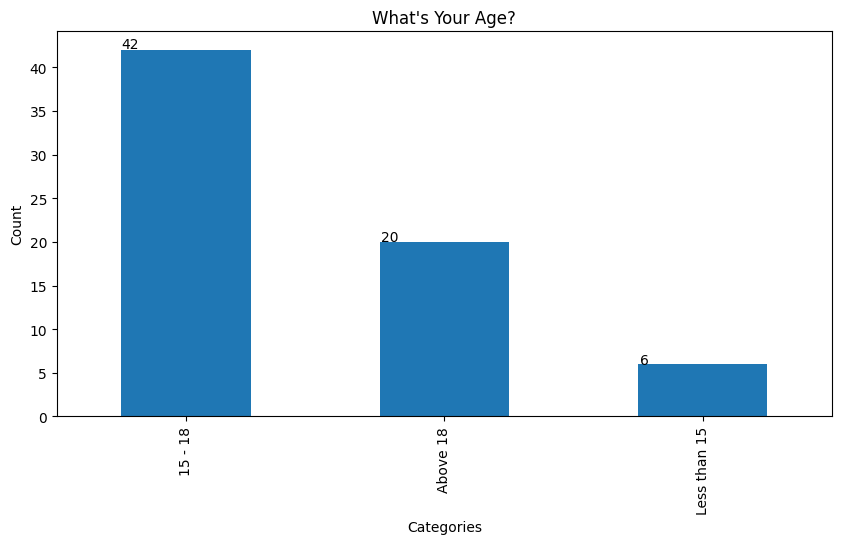

Column What do you consider as Cyber bullying? has 32 unique values


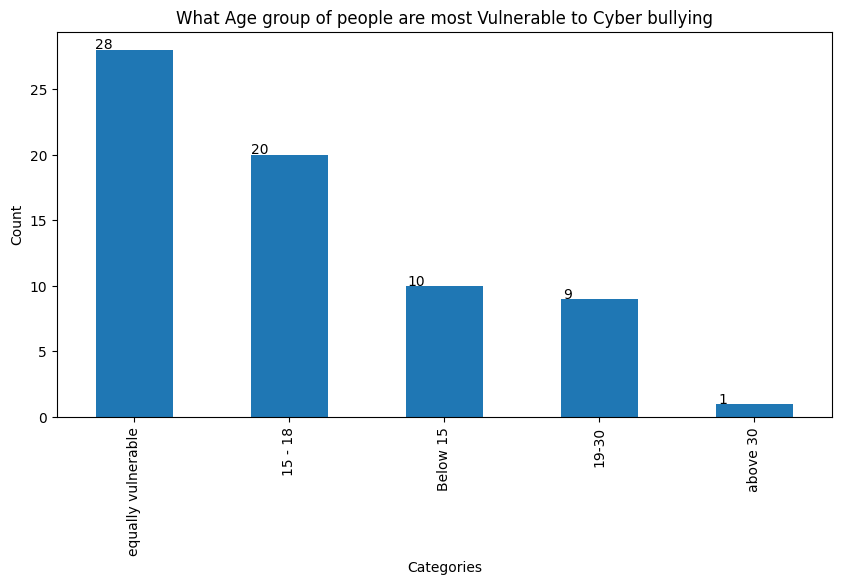

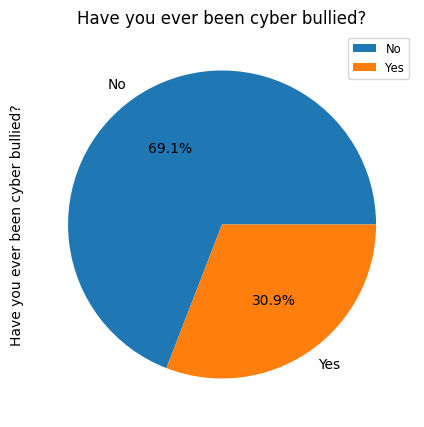

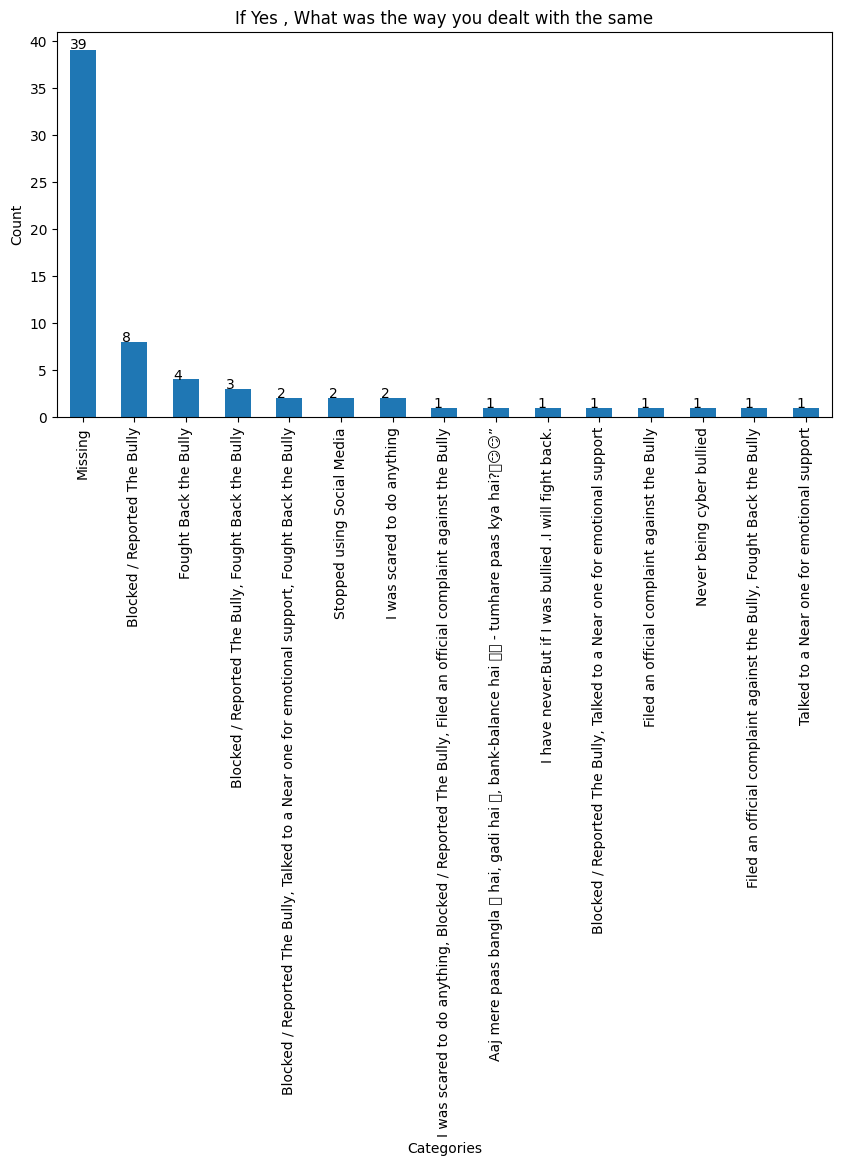

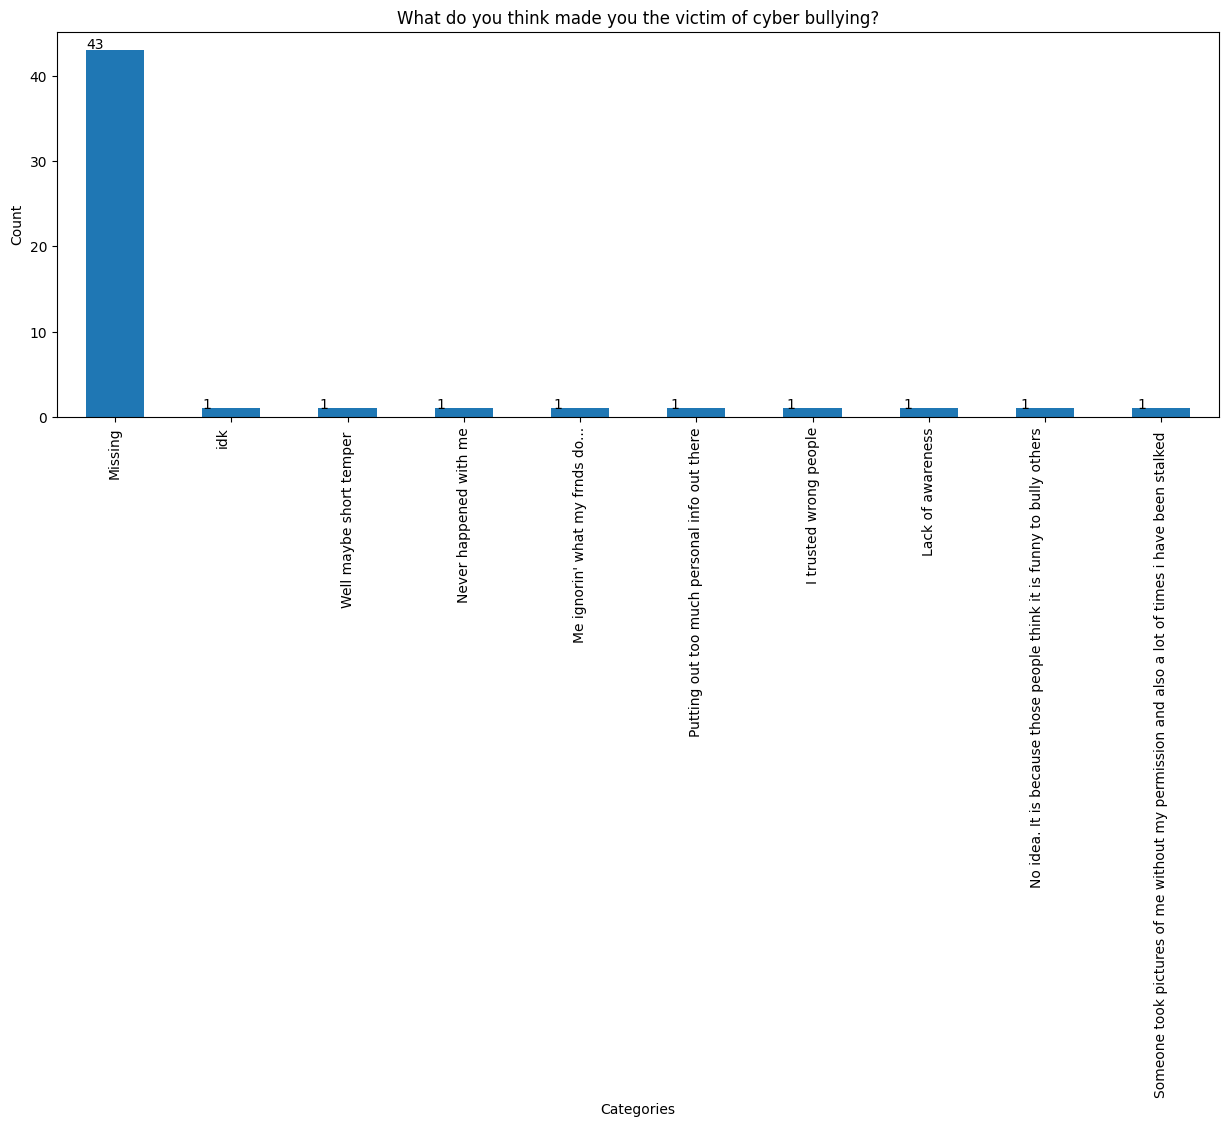

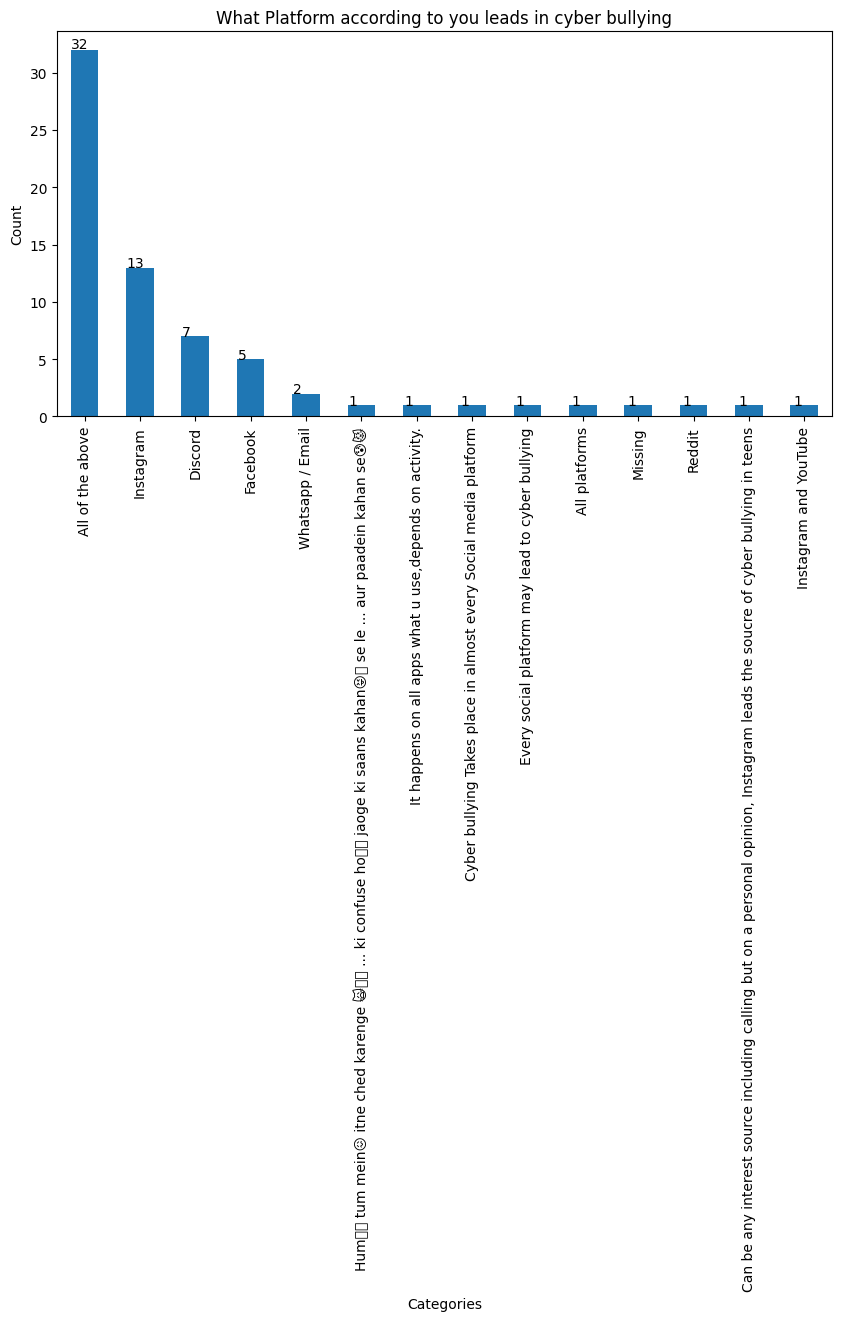

Column What type of people are usually the bullies on the internet? has 55 unique values


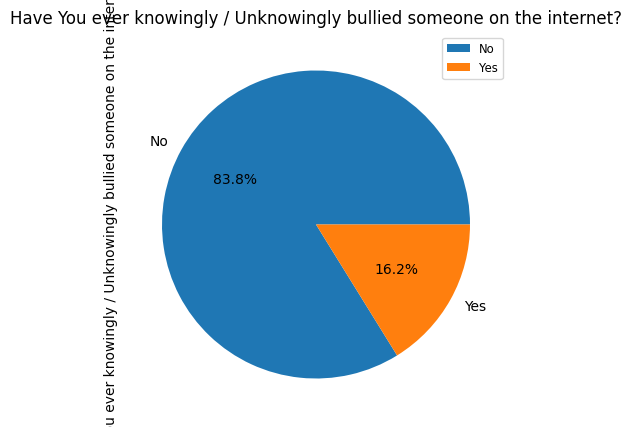

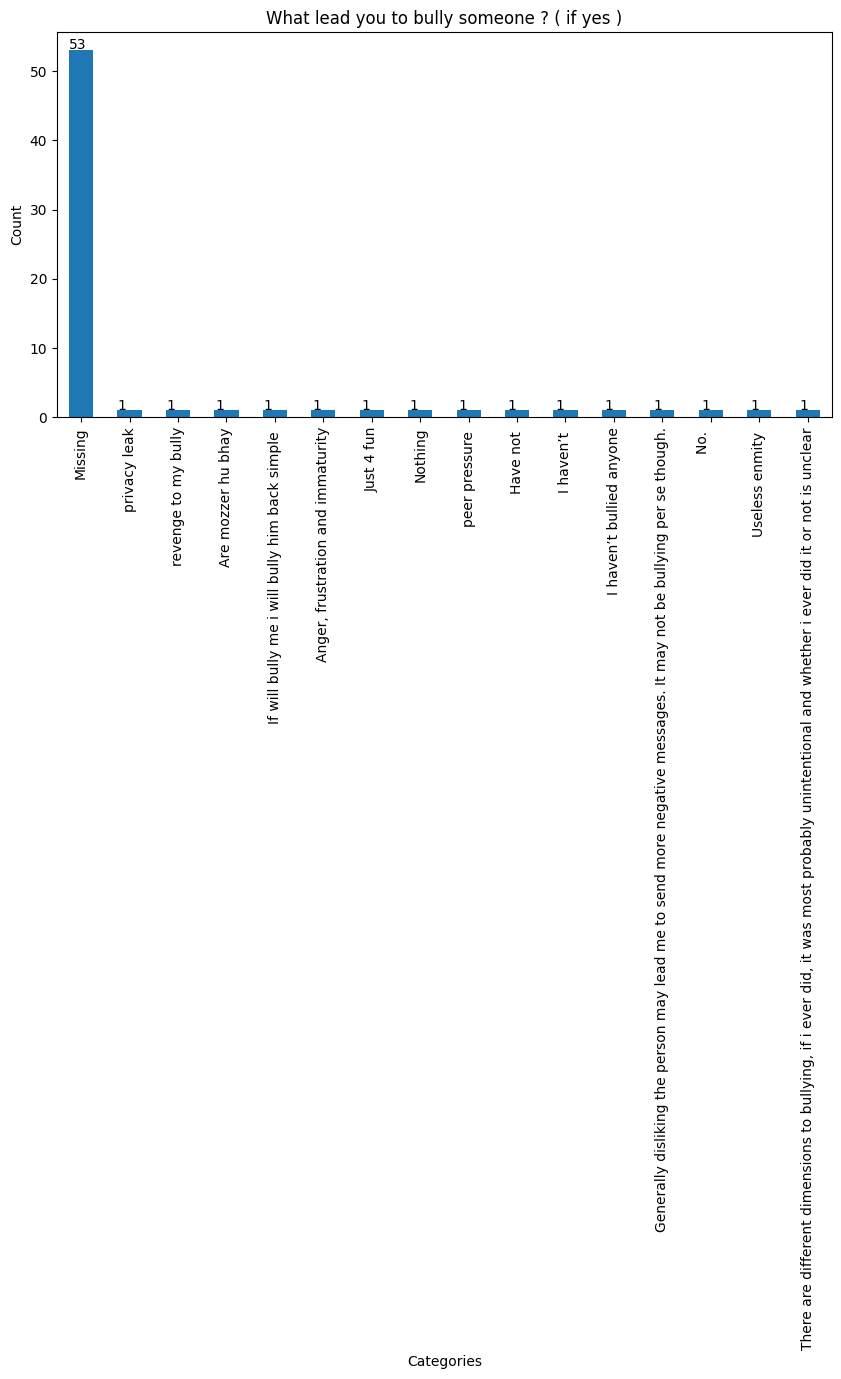

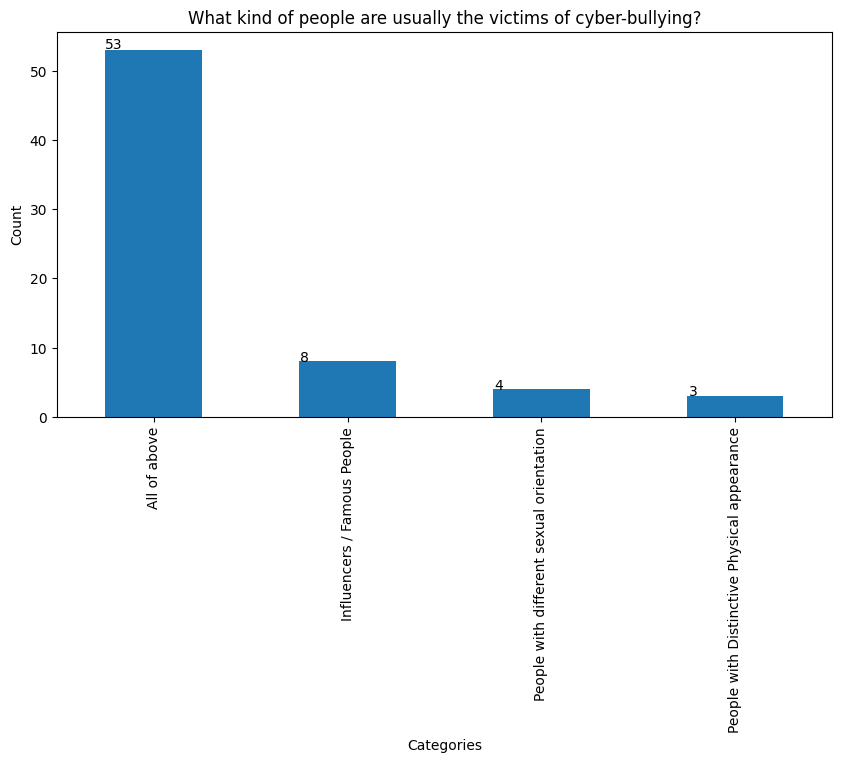

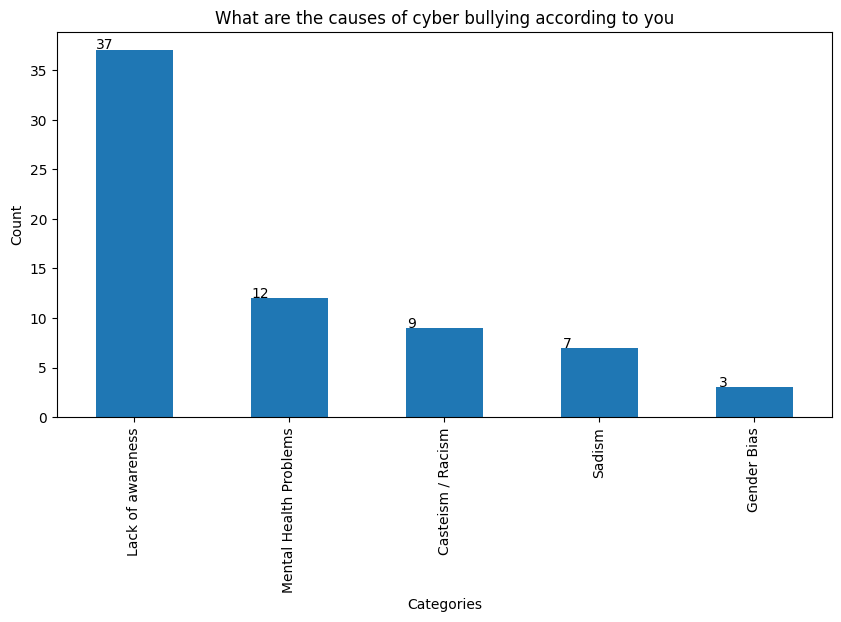

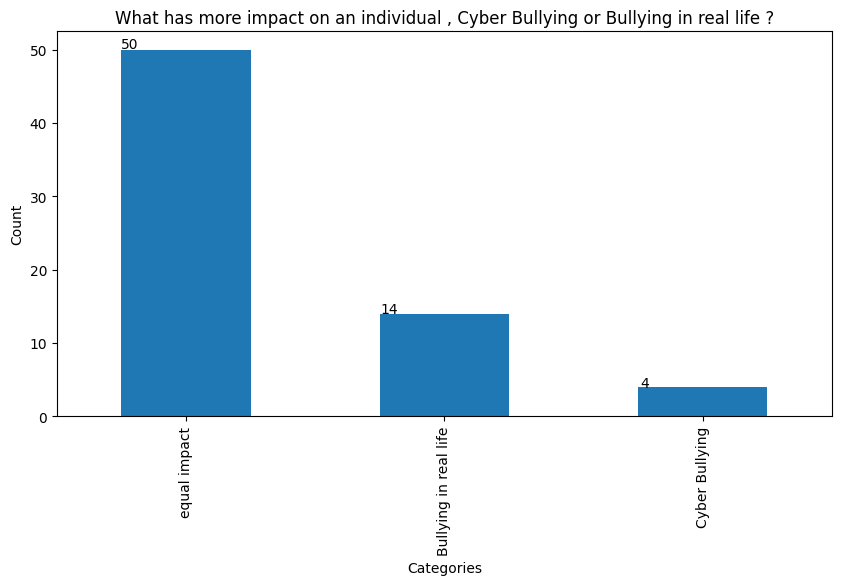

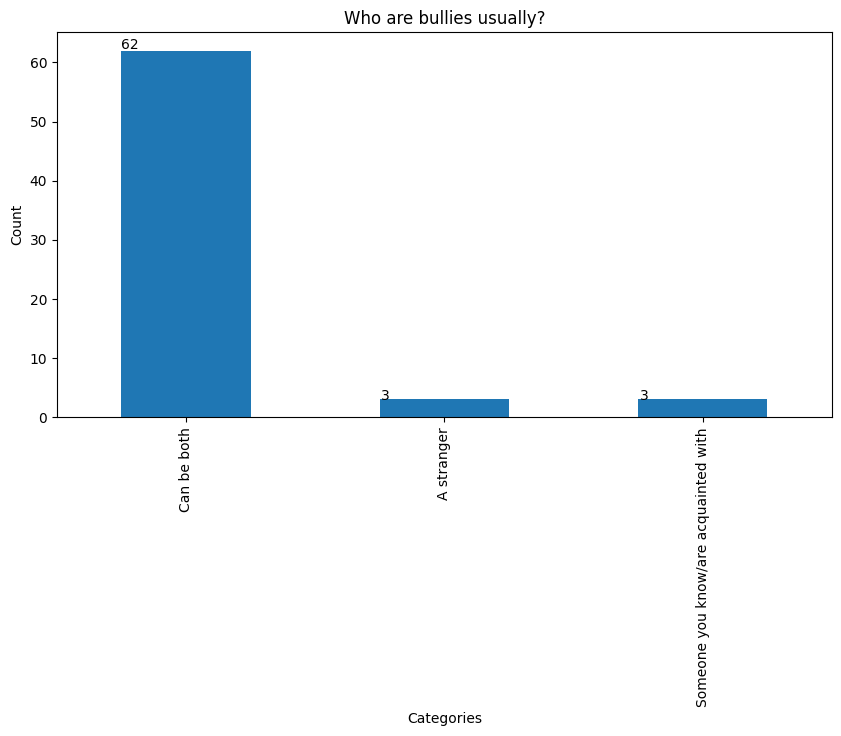

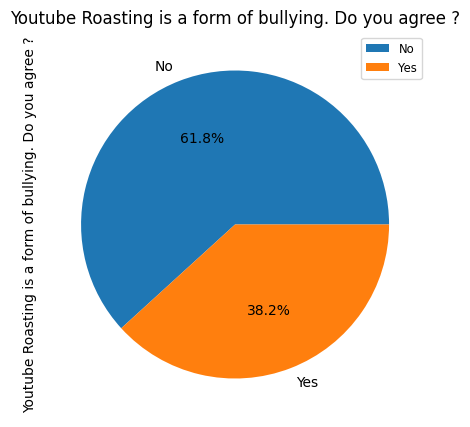

Column Your opinion on the dank communities on  the internet , usually involved in bullying? has 66 unique values


In [7]:
# Visualizing the data
for col in df.columns:
    # If the column has too many unique values, we print the count and move to the next column
    if df[col].nunique() > 30:
        print(f"Column {col} has {df[col].nunique()} unique values")
        continue

    # For the specific column 'What do you think made you the victim of cyber bullying?',
    # take only top 10 values
    if col == 'What do you think made you the victim of cyber bullying?':
        # For this specific column, we plot a bar chart with a wider size
        plt.figure(figsize=(15,5))
        ax = df[col].value_counts().nlargest(10).plot(kind='bar')
        plt.title(col)
        plt.xlabel('Categories')
        plt.ylabel('Count')

        # Annotate the bars with their respective heights
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    elif df[col].nunique() == 2:
        # If the column has only 2 unique values, we plot a pie chart
        plt.figure(figsize=(5,5))
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(col)
        # Place the legend outside the plot
        plt.legend(bbox_to_anchor=(1,1), fontsize='small')
    else:
        # For other columns, we plot a bar chart
        plt.figure(figsize=(10,5))
        ax = df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.xlabel('Categories')
        plt.ylabel('Count')

        # Annotate the bars with their respective heights
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

# Convert Timestamp column to datetime


In [8]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create new features based on the timestamp
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['TimeOfDay'] = df['Timestamp'].dt.hour

# Convert age to integer
df["What's Your Age?"] = pd.to_numeric(df["What's Your Age?"], errors='coerce')


# Temporal Analysis

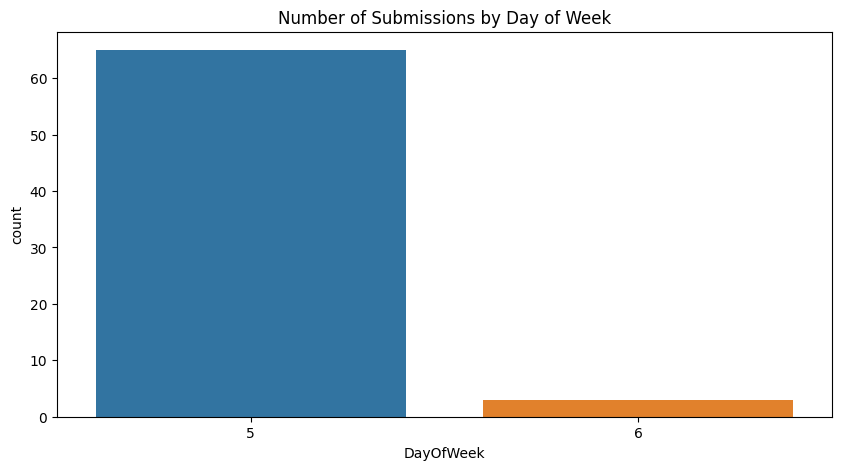

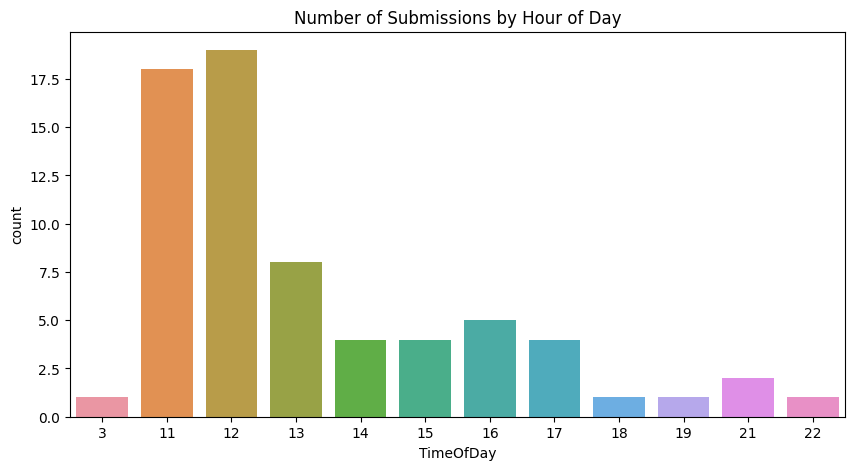

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=df)
plt.title('Number of Submissions by Day of Week')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='TimeOfDay', data=df)
plt.title('Number of Submissions by Hour of Day')
plt.show()

# Correlation Analysis

Index(['Timestamp', 'Email Address', 'What's Your Age?',

       'What do you consider as Cyber bullying?',

       'What Age group of people are most Vulnerable to Cyber bullying',

       'Have you ever been cyber bullied?',

       'If Yes , What was the way you dealt with the same',

       'What do you think made you the victim of cyber bullying?',

       'What Platform according to you leads in cyber bullying',

       'What type of people are usually the bullies on the internet?',

       'Have You ever knowingly / Unknowingly bullied someone on the internet?',

       'What lead you to bully someone ? ( if yes )',

       'What kind of people are usually the victims of cyber-bullying?',

       'What are the causes of cyber bullying according to you',

       'What has more impact on an individual , Cyber Bullying or Bullying in real life ?',

       'Who are bullies usually?',

       'Youtube Roasting is a form of bullying. Do you agree ?',

       'Your opinion on the dank 

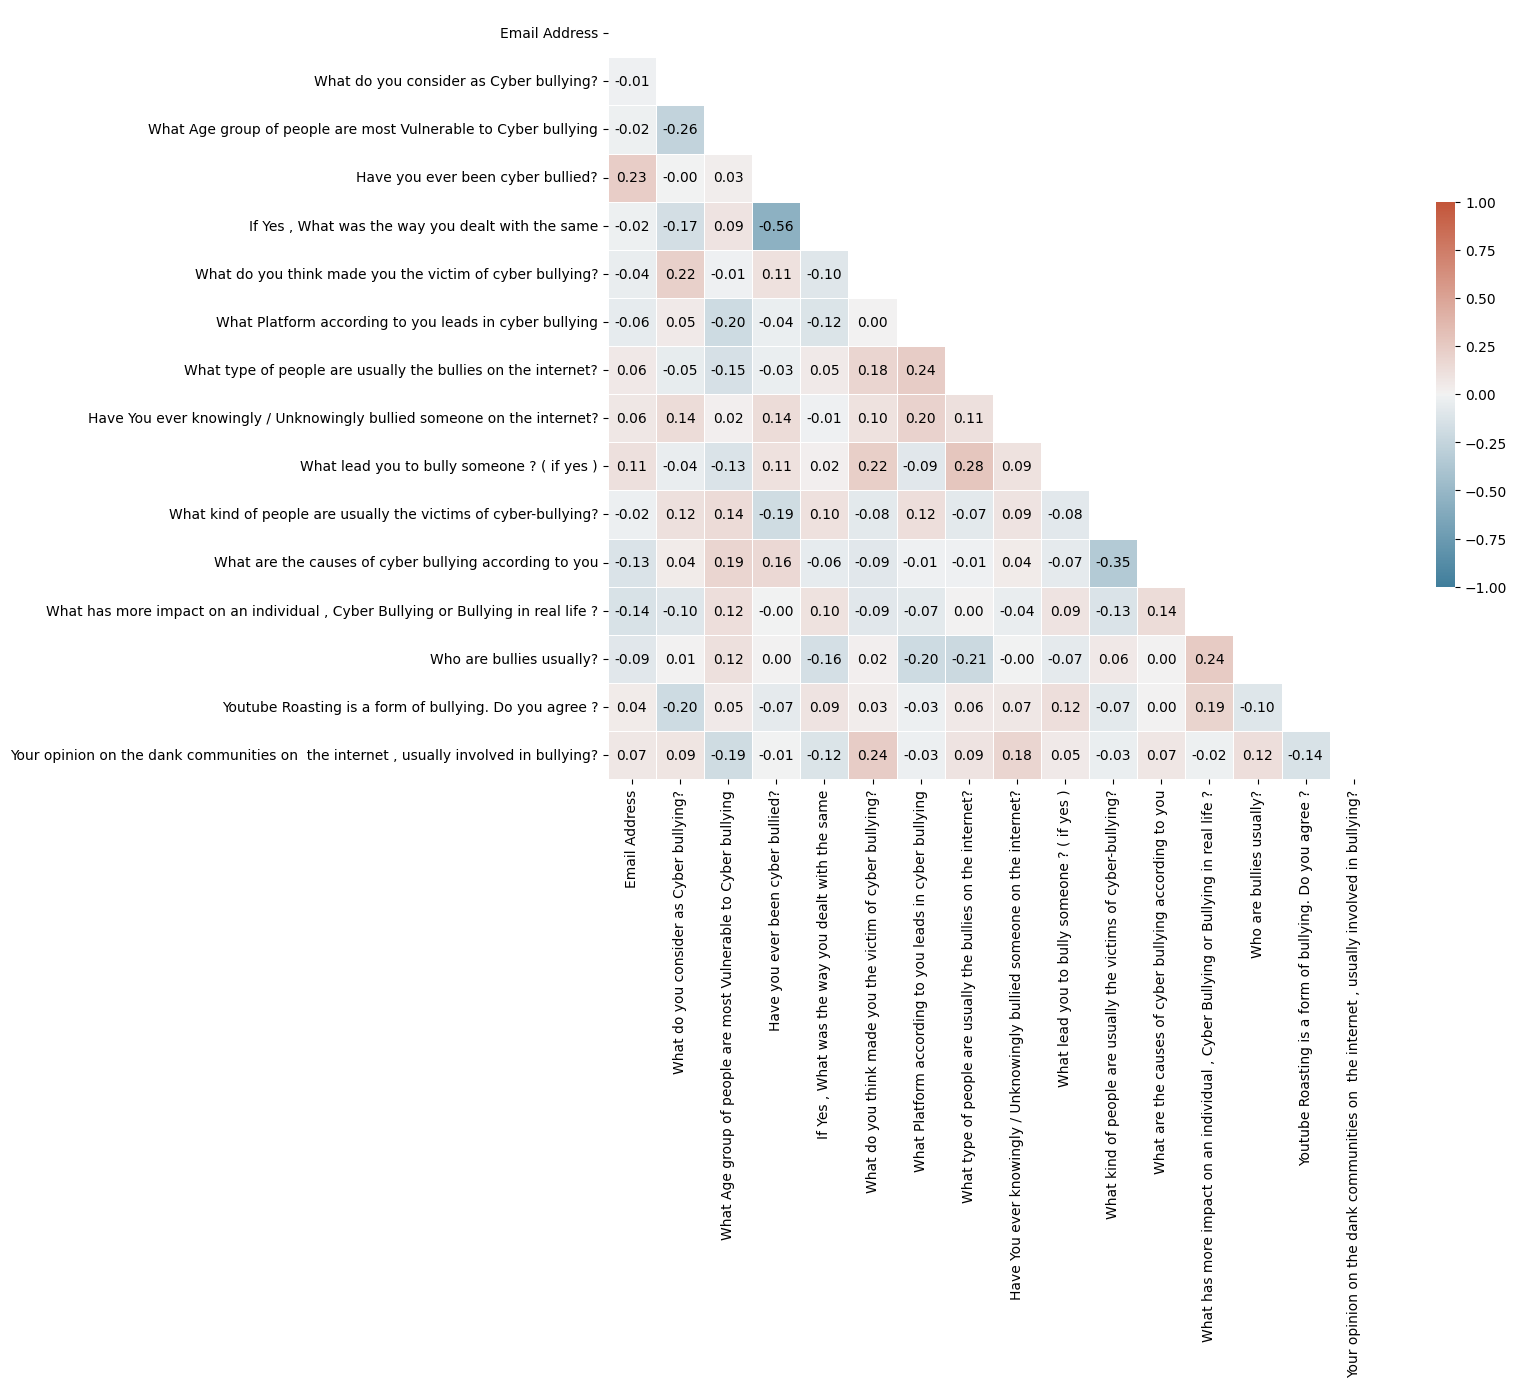

In [10]:
# Load the data
df = pd.read_csv('data.csv')

# Fill missing values with a specific value or strategy
df.fillna("Missing", inplace=True)

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Print the column names
print(df.columns)

# Drop the desired columns
df = df.drop(columns=['Timestamp', "What's Your Age?"])

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=False, fmt=".2f",
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Annotate all correlations
for i in range(len(corr.columns)):
    for j in range(i):
        plt.text(j+0.5, i+0.5, f"{corr.iloc[i,j]:.2f}",
                 ha='center', va='center', color='black')

plt.show()

# Text Analysis

In [11]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df['What do you consider as Cyber bullying?'].astype(str).dropna())
common_words = vectorizer.get_feature_names_out()
print("10 most common words:", common_words)

10 most common words: ['10' '16' '19' '21' '23' '24' '25' '26' '29' '30']


# Platform Analysis

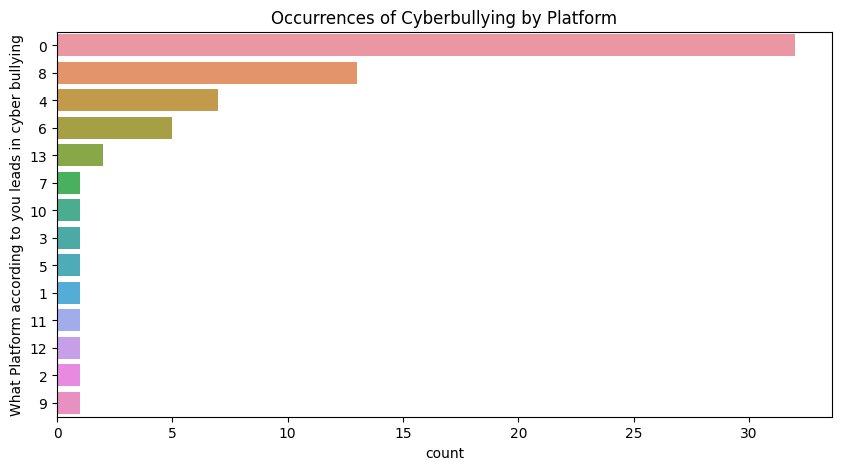

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(y="What Platform according to you leads in cyber bullying", data=df, order=df["What Platform according to you leads in cyber bullying"].value_counts().index)
plt.title('Occurrences of Cyberbullying by Platform')
plt.show()

# Comparative Analysis

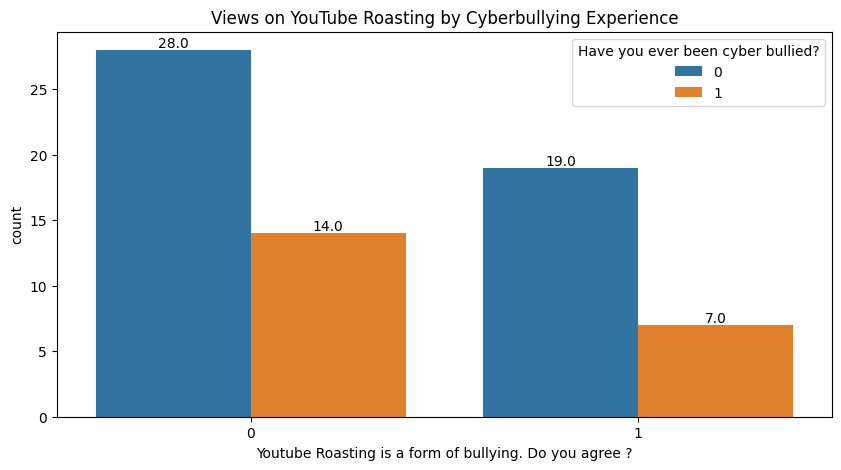

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Youtube Roasting is a form of bullying. Do you agree ?", hue="Have you ever been cyber bullied?", data=df)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Views on YouTube Roasting by Cyberbullying Experience')
plt.show()

# Auto-ML

In [14]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/










In [15]:
# Import necessary libraries
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load data as an h2o frame
h2o_frame = h2o.H2OFrame(df)

# Identify predictors and response
x = h2o_frame.columns
y = "Have you ever been cyber bullied?"
x.remove(y)

# Convert the response column to a factor
h2o_frame[y] = h2o_frame[y].asfactor()

# Split the data into train and test
train, test = h2o_frame.split_frame(ratios = [.8])

# Run AutoML
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# AutoML Leaderboard
lb = aml.leaderboard

# Optionally, you can also print all rows instead of default (10 rows)
lb.head(rows=lb.nrows)

# Predict on test data
preds = aml.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.

Attempting to start a local H2O server...

  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)

  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar

  Ice root: /tmp/tmp_wk7d8ca

  JVM stdout: /tmp/tmp_wk7d8ca/h2o_unknownUser_started_from_python.out

  JVM stderr: /tmp/tmp_wk7d8ca/h2o_unknownUser_started_from_python.err

  Server is running at http://127.0.0.1:54321

Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_unknownUser_43vw0p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,20.87 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%

AutoML progress: |█

13:03:46.57: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 50.0.



██████████████████████████████████████████████████████████████| (done) 100%

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Import metrics for evaluation


In [16]:
# Import metrics for evaluation
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch

# Generate confusion matrix for the predictions
performance = aml.leader.model_performance(test)
print(performance.confusion_matrix())

# You can also check the performance metrics for the leading model
print(performance)

# Get model id of the best model
best_model_id = aml.leader.model_id

# Save the model
h2o.save_model(model=aml.leader, path="/content/", force=True)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3363251772916496

       0    1    Error    Rate

-----  ---  ---  -------  ----------

0      7    3    0.3      (3.0/10.0)

1      0    8    0        (0.0/8.0)

Total  7    11   0.1667   (3.0/18.0)

ModelMetricsBinomial: gbm

** Reported on test data. **



MSE: 0.170168531012986

RMSE: 0.412514885807756

LogLoss: 0.5325360115023348

Mean Per-Class Error: 0.15

AUC: 0.8

AUCPR: 0.6141351579781934

Gini: 0.6000000000000001



Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3363251772916496

       0    1    Error    Rate

-----  ---  ---  -------  ----------

0      7    3    0.3      (3.0/10.0)

1      0    8    0        (0.0/8.0)

Total  7    11   0.1667   (3.0/18.0)



Maximum Metrics: Maximum metrics at their respective thresholds

metric                       threshold    value     idx

---------------------------  -----------  --------  -----

max f1                       0.336325     0.842105  10

max f2             

'/content/GBM_5_AutoML_1_20230619_130344'

# Get model ids for all models in the AutoML Leaderboard


In [17]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.params

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:926: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id

  warnings.warn(


{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_1_20230619_130344',
   'type': 'Key<Model>',
   'URL': '/3/Models/metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_1_20230619_130344'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'levelone_training_StackedEnsemble_AllModels_1_AutoML_1_20230619_130344',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/levelone_training_StackedEnsemble_AllModels_1_AutoML_1_20230619_130344'},
  'input': None},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 5, 'input': 0},
 'checkpoint': {'default': None, 'actual': None, 'input': None},
 'export_checkpoints_dir': {'default': None, 'actual': None, 'input': None},

# ROC Curve


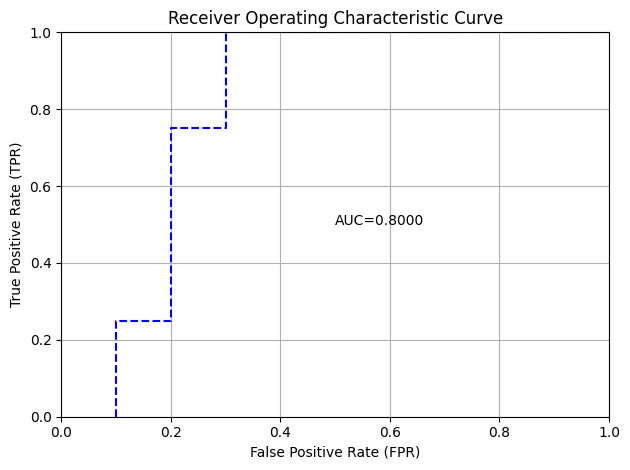

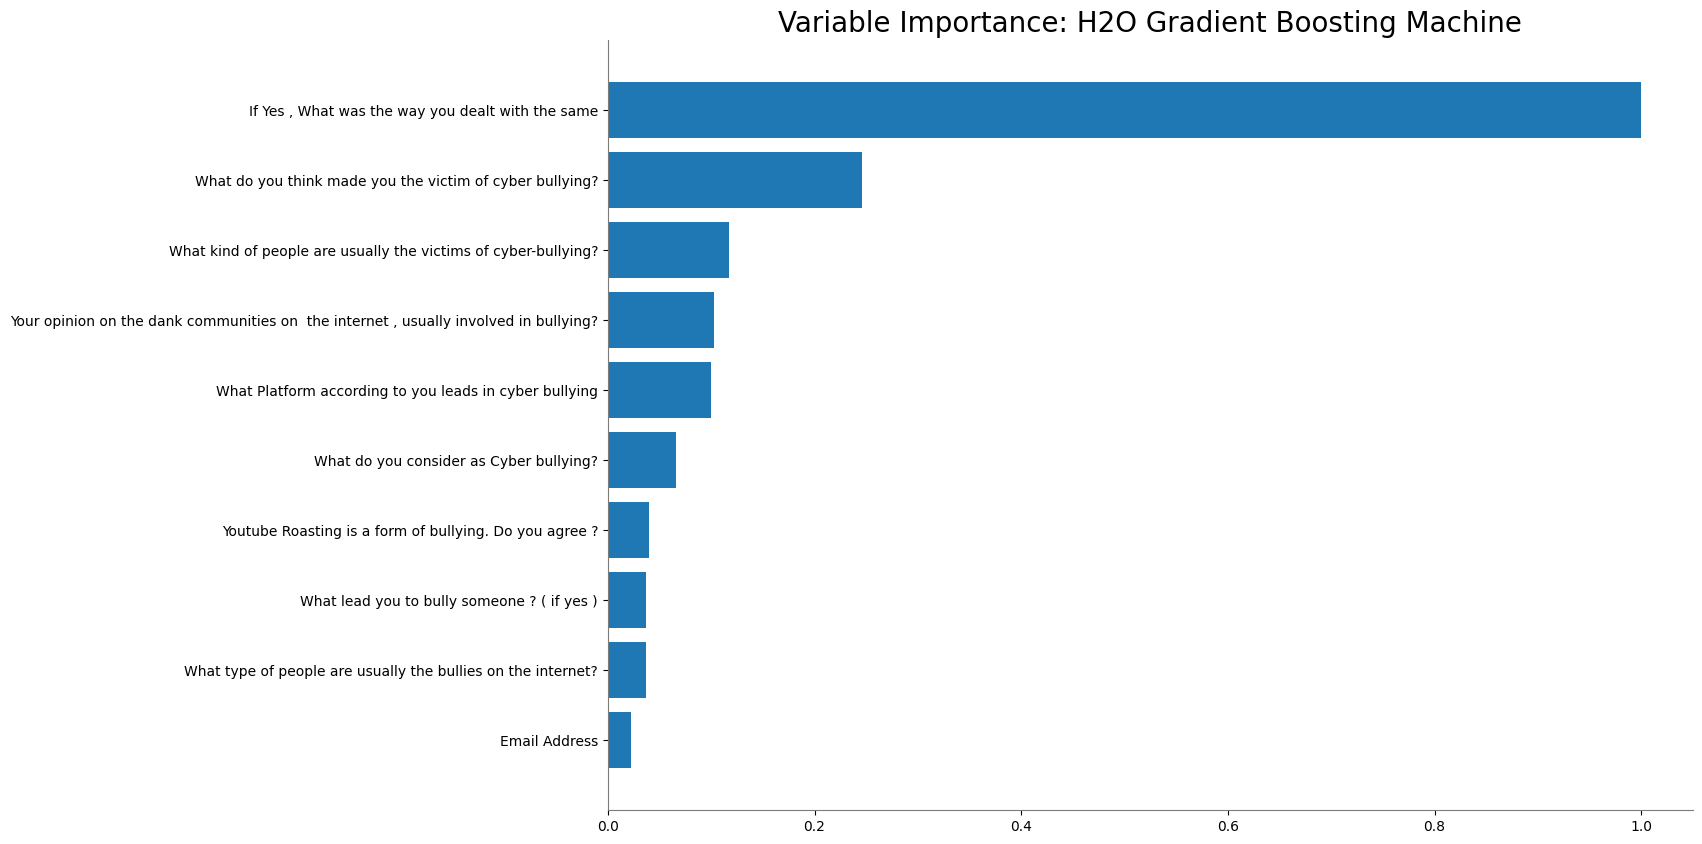

<Figure size 640x480 with 0 Axes>

In [18]:
# ROC Curve
aml.leader.model_performance(test).plot()

# Variable importance
aml.leader.varimp_plot()